
# VRE Jupyter Dashboard

This dashboard contains several modules to run VRE functionality and visualize results.

It assumes a standard installation of Anaconda Python 3, see https://www.continuum.io/downloads. 

Some plots require more dependencies, see below.

## Launch VRE

Kick off a process in VRE as specified in Input/vre.xml

In [1]:
from VRE import *

print ("Loading parameters...")
params = Parameters()
print ("   params is of type", type(params))
params.fromFile("Input/vre.xml")
print ("   setup/asofdate = " + params.get("setup","asofDate"))

print ("Building VREApp...")
vre = VREApp(params)
print ("   vre is of type", type(vre))

Loading parameters...
   params is of type <class 'VRE.vrea.Parameters'>
   setup/asofdate = 2016-02-05
Building VREApp...
   vre is of type <class 'VRE.vrea.VREApp'>


In [2]:
vre.run()
print ("VRE process done");

VRE process done


## Query VRE App Members

Retrieve the market object stored in VREApp and initialized in the previous step when running the VRE process.

Then query the market object for some members (a discount and a forward curve) and evaluate discount factors and zero rates at some point in time in the future.

In [3]:
analytic = vre.getAnalytic("NPV")
print("Got the NPV analytic")

Got the NPV analytic


In [4]:
market  = analytic.getMarket()
print ("Got market object built by the NPV analytic");
asof = market.asofDate();
print ("Market asof date is", asof)

Got market object built by the NPV analytic
Market asof date is 2016-02-05


In [5]:
ccy = "EUR"
index = "EUR-EURIBOR-6M"

print ("Get term structures for ccy ", ccy, "and index", index);

discountCurve = market.discountCurve(ccy)
print ("   discount curve is of type", type(discountCurve))

iborIndex = market.iborIndex(index)
print ("   ibor index is of type", type(iborIndex))

forwardCurve = iborIndex.forwardingTermStructure()
print ("   forward curve is of type", type(forwardCurve))

date = asof + 10*Years;
zeroRateDc = Actual365Fixed()

discount = discountCurve.discount(date)
zero = discountCurve.zeroRate(date, zeroRateDc, Continuous)

fwdDiscount = forwardCurve.discount(date)
fwdZero = forwardCurve.zeroRate(date, zeroRateDc, Continuous)

print ("   10y discount factor (discount curve) is", discount)
print ("   10y discout factor (forward curve) is", fwdDiscount)

print ("   10y zero rate (discount curve) is", zero)
print ("   10y zero rate (forward curve) is", fwdZero)

Get term structures for ccy  EUR and index EUR-EURIBOR-6M
   discount curve is of type <class 'VRE.YieldTermStructureProxy'>
   ibor index is of type <class 'VRE.IborIndexProxy'>
   forward curve is of type <class 'VRE.YieldTermStructureProxy'>
   10y discount factor (discount curve) is 0.9608925885159303
   10y discout factor (forward curve) is 0.9326234183774138
   10y zero rate (discount curve) is 0.003985988524405278
   10y zero rate (forward curve) is 0.0069696499280649145


In [6]:
dc = Actual365Fixed()

# date grid
dates = []
times = []
zeros1 = []
zeros2 = []
date = asof
previousDate = asof
for i in range (1,10*53):
    date = date + Period(1, Weeks);
    time = dc.yearFraction(asof, date)
    dates.append(date)
    times.append(time)
    zero1 = discountCurve.forwardRate(previousDate, date, zeroRateDc, Continuous).rate()
    zero2 = forwardCurve.forwardRate(previousDate, date, zeroRateDc, Continuous).rate()
    zeros1.append(zero1)
    zeros2.append(zero2)
    previousDate = date
    #print (date, time, zero1, zero2)

#print(times)

## Curve Plot

Install matplotlib and numpy with 'pip install matplotlib'.
Then plot the discount and forward curves above, as follows.

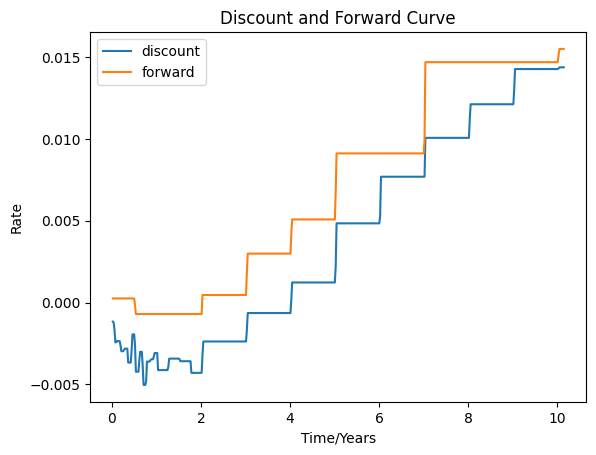

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(times, zeros1, label='discount')
plt.plot(times, zeros2, label='forward')
plt.xlabel('Time/Years')
plt.ylabel('Rate')
plt.title('Discount and Forward Curve')
plt.legend()
plt.show()